In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
file_train = r"C:\Users\user\OneDrive - University of Lagos\Pictures\train.csv\train.csv"
file_test = r"C:\Users\user\OneDrive - University of Lagos\Pictures\train.csv\test.csv"
bank_sub = pd.read_csv(file_train)
test_data = pd.read_csv(file_test)
bank_sub.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [3]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [4]:
bank_sub.isnull().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [5]:
bank_sub.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [6]:
bank_sub.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [7]:
cat_cols = [cols for cols in bank_sub.columns if bank_sub[cols].dtype == "O"]

In [8]:
for i in cat_cols:
    unique_values = bank_sub[i].unique()
    print(f"The unique values in the columns {i} are {unique_values}")

The unique values in the columns customer_id are ['customer_id_39075' 'customer_id_34855' 'customer_id_7107' ...
 'customer_id_38158' 'customer_id_860' 'customer_id_15795']
The unique values in the columns job are ['admin.' 'technician' 'blue-collar' 'services' 'entrepreneur'
 'unemployed' 'housemaid' 'management' 'unknown' 'self-employed' 'retired'
 'student']
The unique values in the columns marital are ['married' 'single' 'divorced' 'unknown']
The unique values in the columns education are ['university.degree' 'basic.6y' 'high.school' 'basic.4y'
 'professional.course' 'basic.9y' 'unknown' 'illiterate']
The unique values in the columns default are ['no' 'unknown' 'yes']
The unique values in the columns housing are ['no' 'yes' 'unknown']
The unique values in the columns loan are ['no' 'yes' 'unknown']
The unique values in the columns contact are ['cellular' 'telephone']
The unique values in the columns month are ['dec' 'may' 'nov' 'jul' 'jun' 'mar' 'aug' 'oct' 'apr' 'sep']
The unique 

In [9]:
train = bank_sub.copy()

train = train.drop(columns = "customer_id")

In [10]:
test_data.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     12357 non-null  object 
 1   age             12357 non-null  int64  
 2   job             12357 non-null  object 
 3   marital         12357 non-null  object 
 4   education       12357 non-null  object 
 5   default         12357 non-null  object 
 6   housing         12357 non-null  object 
 7   loan            12357 non-null  object 
 8   contact         12357 non-null  object 
 9   month           12357 non-null  object 
 10  day_of_week     12357 non-null  object 
 11  duration        12357 non-null  float64
 12  campaign        12357 non-null  int64  
 13  pdays           12357 non-null  int64  
 14  previous        12357 non-null  int64  
 15  poutcome        12357 non-null  object 
 16  emp_var_rate    12357 non-null  float64
 17  cons_price_idx  12357 non-null 

In [12]:
test_data.isnull().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [13]:
test_data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,42.054058,4.320689,2.548515,960.747997,0.173829,0.108814,46.785966,-28.331419,4.622571,5167.091980
std,10.353918,4.284927,2.810921,191.116468,0.496232,1.570976,0.288424,3.228864,1.732755,71.570695
min,19.000000,0.016667,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000
25%,34.000000,1.716667,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000
50%,40.000000,2.983333,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000
75%,49.000000,5.366667,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000
max,96.000000,58.483333,56.000000,999.000000,6.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000


### Outlier Detection

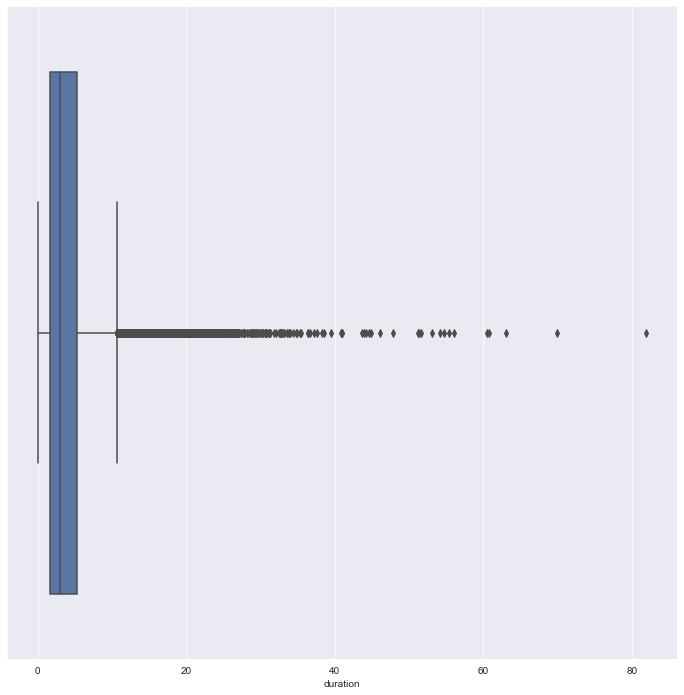

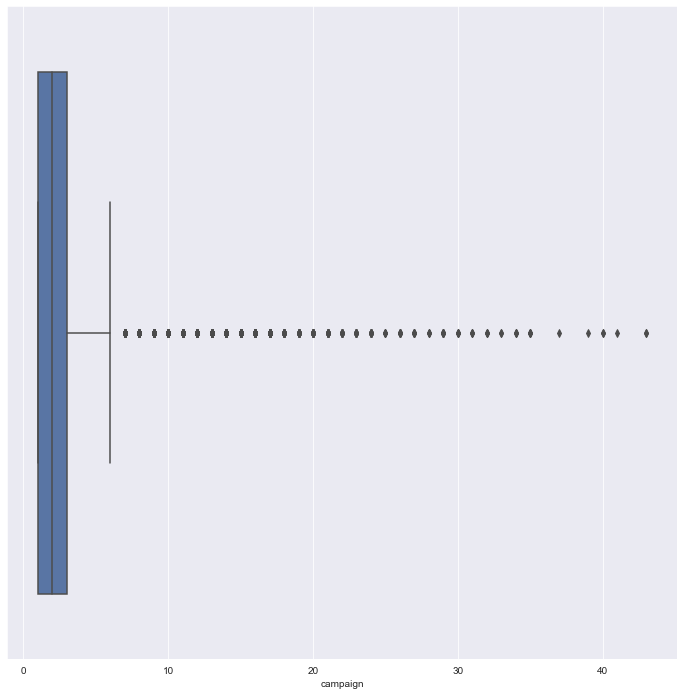

In [14]:
sns.set({"figure.figsize":(12,12)})
for cols in ["duration","campaign"]:
    sns.boxplot(x = cols, data = train)
    plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

upper_duration = 2 * (np.percentile(train["duration"],75))
for index in np.where(train["duration"] > upper_duration)[0]:
    train["duration"][index] = upper_duration

In [16]:
upper_campaign = 2 * (np.percentile(train["campaign"],75))
for index in np.where(train["campaign"] > upper_duration)[0]:
    train["campaign"][index] = upper_campaign

In [17]:
for index in np.where(test_data["duration"] > upper_duration)[0]:
    test_data["duration"][index] = upper_duration
    
for index in np.where(test_data["campaign"] > upper_duration)[0]:
    test_data["campaign"][index] = upper_campaign

### Feature Engineering

In [18]:
age_bins = [18,25,35,60,80,100]
age_labels = ["Budding_adult","Young_adult","Full_blown_adult","Old_Adult","Very_Old"]
train["age_group"] = pd.cut(train["age"], bins = age_bins, labels = age_labels)
test_data["age_group"] = pd.cut(test_data["age"], bins = age_bins, labels = age_labels)

In [19]:
duration_bins = [0,2,5,10,15]
duration_labels = ["Very_Brief","Brief","Long","Very_Long"]
train["duration_group"] = pd.cut(train["duration"], bins = duration_bins, labels = duration_labels)
test_data["duration_group"] = pd.cut(test_data["duration"], bins = duration_bins, labels = duration_labels)

In [20]:
euribor_bins = [0,2,5,10]
euribor_labels = ["low_int_rates","medium_int_rates","high_int_rates"]
train["euribor_int_rate"] = pd.cut(train["euribor3m"], bins = euribor_bins, labels = euribor_labels)
test_data["euribor_int_rate"] = pd.cut(test_data["euribor3m"], bins = euribor_bins, labels = euribor_labels)

In [21]:
train["feature_1"] = train["emp_var_rate"] * train["cons_price_idx"]
test_data["feature_1"] = test_data["emp_var_rate"] * test_data["cons_price_idx"]

train["feature_2"] = train["emp_var_rate"] * train["cons_conf_idx"]
test_data["feature_2"] = test_data["emp_var_rate"] * test_data["cons_conf_idx"]

train["feature_3"] = train["cons_price_idx"] + train["cons_conf_idx"]
test_data["feature_3"] = test_data["cons_price_idx"] + test_data["cons_conf_idx"]

In [22]:
emp_var_bins = [-5,0,5]
emp_var_labels = ["bad_emp_rate","good_emp_rate"]
train["emp_var_cond"] = pd.cut(train["emp_var_rate"], bins = emp_var_bins, labels = emp_var_labels)
test_data["emp_var_cond"] = pd.cut(test_data["emp_var_rate"], bins = emp_var_bins, labels = emp_var_labels)

In [23]:
train["feature_4"] = train["cons_price_idx"] + abs(train["cons_conf_idx"])
test_data["feature_4"] = test_data["cons_price_idx"] + abs(test_data["cons_conf_idx"])

train["feature_5"] = np.mean(train["cons_price_idx"] + abs(train["cons_conf_idx"]))
test_data["feature_5"] = np.mean(test_data["cons_price_idx"] + abs(test_data["cons_conf_idx"]))

In [24]:
test_data = test_data.drop(columns = "customer_id")

### Data Split and Scaling

In [25]:
train_nofeat_eng = bank_sub.copy()

train_nofeat_eng = train_nofeat_eng.drop(columns = "customer_id")

In [26]:
# Features and Targets for train data with engineered features
Feats = train[[cols for cols in train.columns if cols != "subscribed"]]
Targets = train["subscribed"]


# Features and Targets for train data without engineered features
Feats_nofeats_eng = train_nofeat_eng[[cols for cols in train_nofeat_eng.columns if cols != "subscribed"]]
Targets_nofeats_eng = train_nofeat_eng["subscribed"]

In [27]:
new_cat_cols = [cols for cols in Feats.columns if Feats[cols].dtype == "O"]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for cols in new_cat_cols:
    Feats[cols] = encoder.fit_transform(Feats[cols])
#     Feats_nofeats_eng[cols] = encoder.fit_transform(Feats_nofeats_eng[cols])

In [28]:
new_cat_nofeat_eng = [cols for cols in Feats_nofeats_eng.columns if Feats_nofeats_eng[cols].dtype == "O"]
for cols in new_cat_nofeat_eng:
    Feats_nofeats_eng[cols] = encoder.fit_transform(Feats_nofeats_eng[cols])

In [29]:
for cols in ["age_group","duration_group","euribor_int_rate","emp_var_cond"]:
    Feats[cols] = encoder.fit_transform(Feats[cols])

In [30]:
Feats.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr_employed,age_group,duration_group,euribor_int_rate,feature_1,feature_2,feature_3,emp_var_cond,feature_4,feature_5
0,31,0,1,6,0,0,0,0,2,1,...,5023.5,4,2,1,-137.678805,68.6070,23.2565,0,69.4565,75.149196
1,31,9,2,6,0,0,0,1,6,0,...,5099.1,4,2,2,-82.210305,57.2418,14.1065,0,78.7865,75.149196
2,47,1,1,1,1,2,0,1,6,2,...,5191.0,1,0,0,53.106610,-28.7924,21.5170,1,72.4770,75.149196
3,36,7,1,6,0,0,0,0,6,2,...,5099.1,1,2,2,-82.210305,57.2418,14.1065,0,78.7865,75.149196
4,34,0,2,3,0,0,0,0,6,0,...,5099.1,4,3,2,-82.210305,57.2418,14.1065,0,78.7865,75.149196


In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering = True, with_scaling = True, quantile_range = (25.0,75.0))
scaled_feats = pd.DataFrame(scaler.fit_transform(Feats), columns = Feats.columns)

scaled_nofeats_eng = pd.DataFrame(scaler.fit_transform(Feats_nofeats_eng), columns = Feats_nofeats_eng.columns)

In [32]:
from sklearn.model_selection import train_test_split

# Training data with feature engineering without scaling
X_train, X_test, y_train, y_test = train_test_split(Feats, Targets, test_size = 0.2, random_state = 0)

# Training data scaled and with feature engineering
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_feats, Targets,test_size = 0.2,
                                                                               random_state = 0)

# Training data without feature engineering without scaling
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(Feats_nofeats_eng, Targets, test_size = 0.2, random_state = 0)

# Training data scaled and without feature engineering
X_train_scaled_1, X_test_scaled_1, y_train_scaled_1, y_test_scaled_1 = train_test_split(scaled_nofeats_eng, 
                                                                                        Targets,test_size = 0.2,
                                                                                       random_state = 0)

### Building Base Model

In [33]:
Targets.value_counts()

# With this result, oversampling will be required and f1_score will be chosen as a choice metric

0    25580
1     3251
Name: subscribed, dtype: int64

In [34]:
base_model_1 = RandomForestClassifier(max_depth = 4, n_estimators = 200, n_jobs = -1, random_state = 10)
base_model_1.fit(X_train,y_train)
pred_1 = base_model_1.predict(X_test)
accuracy_score(y_test,pred_1)

print(classification_report(y_test,pred_1), "\n")
print(confusion_matrix(y_test,pred_1),"\n")
print(f1_score(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5097
           1       0.81      0.23      0.36       670

    accuracy                           0.90      5767
   macro avg       0.86      0.61      0.65      5767
weighted avg       0.90      0.90      0.88      5767
 

[[5060   37]
 [ 516  154]] 

0.35772357723577236


In [35]:
base_model_2 = RandomForestClassifier(max_depth = 4, n_estimators = 200, n_jobs = -1, random_state = 10)
base_model_2.fit(X_train_scaled,y_train_scaled)
pred_2 = base_model_2.predict(X_test_scaled)
accuracy_score(y_test_scaled,pred_2)

print(classification_report(y_test_scaled,pred_2), "\n")
print(confusion_matrix(y_test_scaled,pred_2),"\n")
print(f1_score(y_test_scaled,pred_2))

# No effect in scaled and unscaled data

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5097
           1       0.81      0.23      0.36       670

    accuracy                           0.90      5767
   macro avg       0.86      0.61      0.65      5767
weighted avg       0.90      0.90      0.88      5767
 

[[5060   37]
 [ 516  154]] 

0.35772357723577236


In [36]:
base_model_3 = RandomForestClassifier(max_depth = 4, n_estimators = 200, n_jobs = -1, random_state = 10)
base_model_3.fit(X_train_1,y_train_1)
pred_3 = base_model_3.predict(X_test_1)
accuracy_score(y_test_1,pred_3)

print(classification_report(y_test_1,pred_3), "\n")
print(confusion_matrix(y_test_1,pred_3),"\n")
print(f1_score(y_test_1,pred_3))

# Visible effect in model accuracy with engineered features and without engineered features

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5097
           1       0.80      0.23      0.35       670

    accuracy                           0.90      5767
   macro avg       0.86      0.61      0.65      5767
weighted avg       0.89      0.90      0.88      5767
 

[[5060   37]
 [ 519  151]] 

0.351981351981352


In [37]:
base_model_4 = RandomForestClassifier(max_depth = 4, n_estimators = 200, n_jobs = -1, random_state = 10)
base_model_4.fit(X_train_scaled_1,y_train_scaled_1)
pred_4 = base_model_4.predict(X_test_scaled_1)
accuracy_score(y_test_scaled_1,pred_4)

print(classification_report(y_test_scaled_1,pred_4), "\n")
print(confusion_matrix(y_test_scaled_1,pred_4),"\n")
print(f1_score(y_test_scaled_1,pred_4))

# Visible effect in model accuracy with engineered features and without engineered features

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5097
           1       0.80      0.23      0.35       670

    accuracy                           0.90      5767
   macro avg       0.86      0.61      0.65      5767
weighted avg       0.89      0.90      0.88      5767
 

[[5060   37]
 [ 519  151]] 

0.351981351981352


In [38]:
# I wanted to experiment the effect of scaling and feature engineering on the model accuracy, 
# although no effect was seen in the case of scaling, as I used a model that was robust to scale of feature values,
# hence doesn't require scaling but a significant effect was noticed with training set with engineered features.

### Dealing with Class Imbalance

In [39]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [40]:
smote_tomek = SMOTETomek(smote = SMOTE(0.82, random_state = 0), tomek = TomekLinks("majority"), 
                         n_jobs = -1, random_state = 0)
train_data_bal, train_target_bal = smote_tomek.fit_resample(X_train, y_train)

In [41]:
import xgboost as XGB

xgb_base = XGB.XGBClassifier(eval_metric = "error", random_state = 0)
xgb_base.fit(train_data_bal, train_target_bal)
xgb_base_pred = xgb_base.predict(X_test)

print(classification_report(y_test,xgb_base_pred), "\n")
print(confusion_matrix(y_test,xgb_base_pred),"\n")
print(f1_score(y_test,xgb_base_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5097
           1       0.57      0.64      0.60       670

    accuracy                           0.90      5767
   macro avg       0.76      0.79      0.77      5767
weighted avg       0.91      0.90      0.90      5767
 

[[4775  322]
 [ 242  428]] 

0.6028169014084508


In [144]:
parameters = {'learning_rate': np.arange(0.03,0.05,0.01),
              'max_depth': range (3, 6),
              'n_estimators': range(400,600,50)}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
tuned_xgb = RandomizedSearchCV(XGB.XGBRegressor(random_state = 0), 
                               param_distributions = parameters, cv = 10 , n_jobs = -1, scoring = "f1")
tuned_xgb.fit(X_train, y_train)
tuned_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold
xgb_acc_list = []
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

for train_index, test_index in skf.split(Feats, Targets):
    
    X_train_skf, X_test_skf = Feats.loc[train_index], Feats.loc[test_index]
    y_train_skf, y_test_skf = Targets.loc[train_index], Targets.loc[test_index]
    
    smote_tomek = SMOTETomek(smote = SMOTE(0.82, random_state = 0), tomek = TomekLinks("majority"), 
                         n_jobs = -1, random_state = 0)
    train_data_bal, train_target_bal = smote_tomek.fit_resample(X_train_skf, y_train_skf)
    
    xgboost = XGB.XGBClassifier(n_estimators = 500, max_depth = 3, learning_rate = 0.03, n_jobs = -1, random_state = 0,
                               eval_metric = "merror")
    
    xgboost.fit(train_data_bal, train_target_bal)
    xgboost_pred = xgboost.predict(X_test_skf)

    xgb_acc_list.append(f1_score(y_test_skf, xgboost_pred))

In [43]:
print(classification_report(y_test_skf, xgboost_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2558
           1       0.52      0.85      0.64       325

    accuracy                           0.89      2883
   macro avg       0.75      0.87      0.79      2883
weighted avg       0.93      0.89      0.90      2883



In [44]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5097
           1       0.52      0.83      0.64       670

    accuracy                           0.89      5767
   macro avg       0.75      0.86      0.79      5767
weighted avg       0.92      0.89      0.90      5767



### LGBM CLassifier

In [45]:
smote_tomek = SMOTETomek(smote = SMOTE(0.85, random_state = 0), tomek = TomekLinks("majority"), 
                         n_jobs = -1, random_state = 0)
train_data_lgbm, train_target_lgbm = smote_tomek.fit_resample(X_train, y_train)

# I tested various values for smote oversampler to achieve a 0.85 sampling strategy

In [46]:
import lightgbm as LGBM

lgbm_base = LGBM.LGBMClassifier(random_state = 0)
lgbm_base.fit(train_data_lgbm, train_target_lgbm)
lgbm_base_pred = lgbm_base.predict(X_test)

print(classification_report(y_test,lgbm_base_pred), "\n")
print(confusion_matrix(y_test,lgbm_base_pred),"\n")
print(f1_score(y_test,lgbm_base_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5097
           1       0.55      0.73      0.63       670

    accuracy                           0.90      5767
   macro avg       0.76      0.83      0.79      5767
weighted avg       0.92      0.90      0.91      5767
 

[[4703  394]
 [ 182  488]] 

0.6288659793814433


In [47]:
lgbm_parameters = {'learning_rate': np.arange(0.1,0.2,0.01),
                  'max_depth': range (8, 11, 1),
                  'num_leaves' : range(29,35),
                  'n_estimators': range(600,800,50)}

In [199]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
tuned_lgbm = RandomizedSearchCV(LGBM.LGBMClassifier(random_state = 0),param_distributions = lgbm_parameters, 
                                cv = 10 , n_jobs = -1, scoring = "f1")
tuned_lgbm.fit(train_data_lgbm, train_target_lgbm)
tuned_lgbm.best_estimator_

LGBMClassifier(learning_rate=0.15999999999999998, max_depth=8, n_estimators=700,
               num_leaves=33, random_state=0)

In [48]:
lgbm_acc_list = []
  
for train_index, test_index in skf.split(Feats, Targets):
    X_train_skf, X_test_skf = Feats.loc[train_index], Feats.loc[test_index]
    y_train_skf, y_test_skf = Targets.loc[train_index], Targets.loc[test_index]
    
    smote_tomek = SMOTETomek(smote = SMOTE(0.85, random_state = 0), tomek = TomekLinks("majority"), 
                         n_jobs = -1, random_state = 0)
    train_data_lb, train_target_lb = smote_tomek.fit_resample(X_train_skf, y_train_skf)
    
    light_gbm = LGBM.LGBMClassifier(n_estimators = 700, max_depth = 8, learning_rate = 0.16, n_jobs = -1, random_state = 0,
                              num_leaves = 33, boosting_type = "gbdt")
    
    light_gbm.fit(train_data_lb, train_target_lb)
    lgbm_pred = light_gbm.predict(X_test_skf)

    lgbm_acc_list.append(accuracy_score(y_test_skf, lgbm_pred))

In [52]:
np.mean(lgbm_acc_list)

0.9055182034625474

In [51]:
print(classification_report(y_test_skf, light_gbm.predict(X_test_skf)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2558
           1       0.60      0.63      0.61       325

    accuracy                           0.91      2883
   macro avg       0.78      0.79      0.78      2883
weighted avg       0.91      0.91      0.91      2883



In [50]:
print(confusion_matrix(y_test, light_gbm.predict(X_test)))

[[5054   43]
 [  27  643]]


### Submission

In [60]:
for cols in new_cat_cols:
    test_data[cols] = encoder.fit_transform(test_data[cols])
    
for cols in ["age_group","duration_group","euribor_int_rate","emp_var_cond"]:
    test_data[cols] = encoder.fit_transform(test_data[cols])

In [58]:
sample = pd.read_csv(r"C:\Users\user\OneDrive - University of Lagos\Pictures\train.csv\sample_submission.csv")
sample.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [61]:
sample["Prediction"] = light_gbm.predict(test_data)
del sample["subscribed"]

In [62]:
sample.to_csv("Bank_Subscription_submission.csv", index = False)

In [63]:
sample.rename(columns = {"Prediction":"subscribed"}, inplace = True)

In [64]:
sample.to_csv("Bank_Subscription_submission1.csv", index = False)

### Saving Model to Pickle

In [65]:
import pickle
filename = 'Bank_Subscription.pkl'
pickle.dump(light_gbm, open(filename, 'wb'))